# ROC Curve and AUC Score - Machine Learning Classification Metrics Python
Tutorial made from 'ROC Curve and AUC Score - Machine Learning Classification Metrics Python' (DataMItes) by Marcus Marian

**ROC Curve and AUC Score - Machine Learning Classification Metrics Python: [DataMItes.](https://www.youtube.com/watch?v=2ru56OLpBOQ&t=44s)**  


## ROC (Receiver Operating Characteristic )  Curve
## AUC (Area Under the Curve ) Score

### The ROC graph summarizes all of the confusion matrices tha each threshold produced.
- __ROC__ curves make it easy to identify the best threshold for making a decision

### AUC is the area of the ROC curve
- __AUC__ can help you decide which categorization method is better.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
base = pd.read_csv("data/input_breast.csv")
print(base.shape)
base.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [3]:
y = pd.read_csv("data/output_breast.csv")
print(y.shape)
y.head()

(569, 1)


,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
# base.corr().outcome.sort_values()
base.corr()

In [5]:
# X = base.iloc[:,[0]]
X = base
# y = data.outcome
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [6]:
y = y.values.flatten()

In [7]:
print(y.shape)
y[:10]

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=100)

model.fit(X_train,y_train)
y_pred= model.predict(X_test)

C:\Users\marcus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\marcus\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
pd.crosstab(y_test, y_pred)

0.9181286549707602


col_0,0,1
row_0,,
0,53,6
1,8,104


In [12]:
# Probability of not having cancer and probality of having cancer
# model.predict_proba(Xtest)

# Probability of having cancer
model.predict_proba(X_test)[:,1]

array([2.61531756e-08, 1.00000000e+00, 9.96449146e-01, 4.32425852e-04,
       9.94953402e-01, 1.00000000e+00, 9.99560428e-01, 5.09036902e-01,
       3.75393223e-07, 7.57577007e-02, 9.99907371e-01, 9.99771013e-01,
       3.97069589e-01, 9.98259560e-01, 1.23625123e-03, 9.61609198e-04,
       9.96160901e-01, 3.82254349e-01, 9.29493605e-01, 9.75308037e-02,
       7.40436432e-01, 9.94691927e-01, 1.00000000e+00, 9.74420498e-01,
       1.20248981e-08, 3.36098158e-08, 9.11323007e-01, 1.26663099e-07,
       9.98777399e-01, 7.32958838e-01, 9.99432534e-01, 9.87676268e-01,
       2.71855192e-11, 9.99384377e-01, 6.78829560e-01, 9.97488190e-01,
       9.86143847e-01, 1.00000000e+00, 9.97837555e-01, 9.95189914e-01,
       9.99843944e-01, 1.00000000e+00, 1.00000000e+00, 7.59443097e-01,
       9.99477464e-01, 2.69567940e-18, 4.85241489e-03, 4.82875923e-03,
       8.67702857e-02, 1.00000000e+00, 9.65748232e-01, 9.91787284e-01,
       7.48407298e-04, 9.82546496e-01, 9.94424665e-01, 2.50741972e-26,
      

In [13]:

y_pred_th3 = np.where(model.predict_proba(X_test)[:,1] > 0.3, 1, 0) # Threshold is 0.3
y_pred_th4 = np.where(model.predict_proba(X_test)[:,1]> 0.4, 1, 0) # Threshold is 0.3

In [14]:
pd.crosstab(y_test, y_pred_th4)

col_0,0,1
row_0,,
0,53,6
1,8,104


In [15]:
def predict_threshold (model, X_test, thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1] > thresholds, 1, 0) # Threshold is 0.3

In [16]:
from sklearn.metrics import confusion_matrix

for thr in np.arange(0, 1.1, 0.1):
    y_pred = predict_threshold(model, X_test, thr)
    print("Threshold :", thr)
    print(confusion_matrix(y_test,y_pred))

Threshold : 0.0
[[  0  59]
 [  0 112]]
Threshold : 0.1
[[ 51   8]
 [  5 107]]
Threshold : 0.2
[[ 51   8]
 [  5 107]]
Threshold : 0.30000000000000004
[[ 52   7]
 [  6 106]]
Threshold : 0.4
[[ 53   6]
 [  8 104]]
Threshold : 0.5
[[ 53   6]
 [  8 104]]
Threshold : 0.6000000000000001
[[ 53   6]
 [ 10 102]]
Threshold : 0.7000000000000001
[[ 53   6]
 [ 11 101]]
Threshold : 0.8
[[56  3]
 [15 97]]
Threshold : 0.9
[[57  2]
 [17 95]]
Threshold : 1.0
[[ 59   0]
 [112   0]]


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

In [18]:
tpr, fpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

In [19]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.94851820e-01, 9.94691927e-01,
       9.82458131e-01, 9.78052876e-01, 8.40766025e-01, 8.33557112e-01,
       7.76389817e-01, 7.59443097e-01, 7.44444169e-01, 7.40436432e-01,
       5.09036902e-01, 3.97069589e-01, 2.68938584e-01, 2.39836068e-01,
       9.75308037e-02, 8.39224055e-02, 8.06757557e-02, 7.57577007e-02,
       7.29375719e-02, 1.65202484e-02, 1.54352126e-02, 9.61609198e-04,
       7.56802256e-04, 3.19888643e-31])

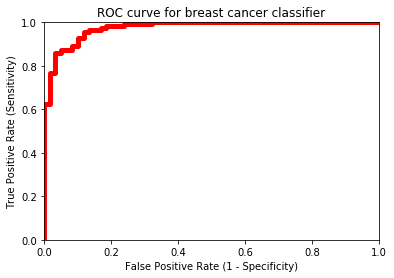

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, 
                                 model.predict_proba(X_test)[:,1], 
                                 drop_intermediate=False)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw = 5)
plt.show()

In [22]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9759382566585957